## 任务说明

- 任务主题：论文数量统计，即统计2019年全年计算机各个方向论文数量；
- 任务内容：赛题的理解、使用 **Pandas** 读取数据并进行统计；
- 任务成果：学习 **Pandas** 的基础操作；
- 可参考的学习资料：[开源组织Datawhale joyful-pandas项目](https://github.com/datawhalechina/joyful-pandas)

## 数据集介绍

- 数据集来源：[数据集链接](https://www.kaggle.com/Cornell-University/arxiv)；
- 数据集的格式如下：
  - `id`：arXiv ID，可用于访问论文；
  - `submitter`：论文提交者；
  - `authors`：论文作者；
  - `title`：论文标题；
  - `comments`：论文页数和图表等其他信息；
  - `journal-ref`：论文发表的期刊的信息；
  - `doi`：数字对象标识符，[https://www.doi.org](https://www.doi.org)；
  - `report-no`：报告编号；
  - `categories`：论文在 arXiv 系统的所属类别或标签；
  - `license`：文章的许可证；
  - `abstract`：论文摘要；
  - `versions`：论文版本；
  - `authors_parsed`：作者的信息。

```
"root":{
		"id":string"0704.0001"
		"submitter":string"Pavel Nadolsky"
		"authors":string"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan"
		"title":string"Calculation of prompt diphoton production cross sections at Tevatron and LHC energies"
		"comments":string"37 pages, 15 figures; published version"
		"journal-ref":string"Phys.Rev.D76:013009,2007"
		"doi":string"10.1103/PhysRevD.76.013009"
		"report-no":string"ANL-HEP-PR-07-12"
		"categories":string"hep-ph"
		"license":NULL
		"abstract":string"  A fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders. All next-to-leading order perturbative contributions from quark-antiquark, gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as all-orders resummation of initial-state gluon radiation valid at next-to-next-to leading logarithmic accuracy. The region of phase space is specified in which the calculation is most reliable. Good agreement is demonstrated with data from the Fermilab Tevatron, and predictions are made for more detailed tests with CDF and DO data. Predictions are shown for distributions of diphoton pairs produced at the energy of the Large Hadron Collider (LHC). Distributions of the diphoton pairs from the decay of a Higgs boson are contrasted with those produced from QCD processes at the LHC, showing that enhanced sensitivity to the signal can be obtained with judicious selection of events."
		"versions":[
				0:{
						"version":string"v1"
						"created":string"Mon, 2 Apr 2007 19:18:42 GMT"
					}
				1:{
						"version":string"v2"
						"created":string"Tue, 24 Jul 2007 20:10:27 GMT"
					}]
		"update_date":string"2008-11-26"
		"authors_parsed":[
				0:[
						0:string"Balázs"
						1:string"C."
						2:string""]
				1:[
						0:string"Berger"
						1:string"E. L."
						2:string""]
				2:[
						0:string"Nadolsky"
						1:string"P. M."
						2:string""]
				3:[
						0:string"Yuan"
						1:string"C. -P."
						2:string""]]
}
```


## arxiv论文类别介绍

我们从arxiv官网，查询到论文的类别名称以及其解释如下。

链接：[https://arxiv.org/help/api/user-manual](https://arxiv.org/help/api/user-manual)  的 5.3 小节的 Subject Classifications 的部分，或 [https://arxiv.org/category_taxonomy](https://arxiv.org/category_taxonomy)， 具体的153种paper的类别部分如下：

```json
'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
```

## 具体代码实现以及讲解

### 导入package并读取原始数据

In [3]:
!pip3 install lxml bs4 --user

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [4]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

这里使用的package的版本如下（python 3.7.4）：

- seaborn：0.9.0
- BeautifulSoup：4.8.0
- requests：2.22.0
- json：0.8.5
- pandas：0.25.1
- matplotlib：3.1.1

In [5]:
# 读入数据
data  = []

#使用with语句优势：1.自动关闭文件句柄；2.自动显示（处理）文件读取数据异常
with open("arxiv-metadata-oai-2019.json", 'r') as f: 
    for idx, line in enumerate(f): 
        
        # 读取前100行，如果读取所有数据需要8G内存
        if idx >= 100:
            break
        
        data.append(json.loads(line))
        
data = pd.DataFrame(data) #将list变为dataframe格式，方便使用pandas进行分析
data.shape #显示数据大小

(100, 14)

In [6]:
data.head() #显示数据的前五行

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0297,Sung-Chul Yoon,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...",Remnant evolution after a carbon-oxygen white ...,"15 pages, 15 figures, 3 tables, submitted to M...",None,10.1111/j.1365-2966.2007.12161.x,None,astro-ph,None,We systematically explore the evolution of t...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,..."
1,0704.0342,Patrice Ntumba Pungu,B. Dugmore and PP. Ntumba,Cofibrations in the Category of Frolicher Spac...,27 pages,None,None,None,math.AT,None,Cofibrations are defined in the category of ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Dugmore, B., ], [Ntumba, PP., ]]"
2,0704.0360,Zaqarashvili,T.V. Zaqarashvili and K Murawski,Torsional oscillations of longitudinally inhom...,"6 pages, 3 figures, accepted in A&A",None,10.1051/0004-6361:20077246,None,astro-ph,None,We explore the effect of an inhomogeneous ma...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Zaqarashvili, T. V., ], [Murawski, K, ]]"
3,0704.0525,"Sezgin Ayg\""un","Sezgin Aygun, Ismail Tarhan, Husnu Baysal",On the Energy-Momentum Problem in Static Einst...,This submission has been withdrawn by arXiv ad...,"Chin.Phys.Lett.24:355-358,2007",10.1088/0256-307X/24/2/015,None,gr-qc,None,This paper has been removed by arXiv adminis...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2019-10-21,"[[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa..."
4,0704.0535,Antonio Pipino,"Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...",The Formation of Globular Cluster Systems in M...,"32 pages (referee format), 9 figures, ApJ acce...","Astrophys.J.665:295-305,2007",10.1086/519546,None,astro-ph,None,The most massive elliptical galaxies show a ...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2019-08-19,"[[Pipino, Antonio, ], [Puzia, Thomas H., ], [M..."


In [7]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-2019.json', ['id', 'categories', 'update_date'])


### 数据预处理

首先我们先来粗略统计论文的种类信息：

- `count`：一列数据的元素个数；
- `unique`：一列数据中元素的种类；
- `top`：一列数据中出现频率最高的元素；
- `freq`：一列数据中出现频率最高的元素的个数；

In [8]:
data["categories"].describe()

count     170618
unique     15592
top        cs.CV
freq        5559
Name: categories, dtype: object

以上的结果表明：共有1338381个数据，有61371个子类（因为有论文的类别是多个，例如一篇paper的类别是CS.AI & CS.MM和一篇paper的类别是CS.AI & CS.OS属于不同的子类别，这里仅仅是粗略统计），其中最多的种类是astro-ph，即Astrophysics（天体物理学），共出现了86914次。

由于部分论文的类别不止一种，所以下面我们判断在本数据集中共出现了多少种独立的数据集。

In [ ]:
unique_categories = set([i for l in [x.split(' ') for x in data["categories"]] for i in l])
len(unique_categories)
unique_categories

这里使用了 split 函数将多类别使用 “ ”（空格）分开，组成list，并使用 for 循环将独立出现的类别找出来，并使用 set 类别，将重复项去除得到最终所有的独立paper种类。

从以上结果发现，共有176种论文种类，比我们直接从 [https://arxiv.org/help/api/user-manual](https://arxiv.org/help/api/user-manual)  的 5.3 小节的 Subject Classifications 的部分或 [https://arxiv.org/category_taxonomy](https://arxiv.org/category_taxonomy)中的到的类别少，这说明存在一些官网上没有的类别，这是一个小细节。不过对于我们的计算机方向的论文没有影响，依然是以下的40个类别，我们从原数据中提取的和从官网的到的种类是可以一一对应的。

我们的任务要求对于2019年以后的paper进行分析，所以首先对于时间特征进行预处理，从而得到2019年以后的所有种类的论文：

In [ ]:
data["year"] = pd.to_datetime(data["update_date"]).dt.year #将update_date从例如2019-02-20的str变为datetime格式，并提取处year
del data["update_date"] #删除 update_date特征，其使命已完成
data = data[data["year"] >= 2019] #找出 year 中2019年以后的数据，并将其他数据删除

# data.groupby(['categories','year']) #以 categories 进行排序，如果同一个categories 相同则使用 year 特征进行排序
data.reset_index(drop=True, inplace=True) #重新编号
data #查看结果

这里我们就已经得到了所有2019年以后的论文，下面我们挑选出计算机领域内的所有文章：

In [11]:
#爬取所有的类别
website_url = requests.get('https://arxiv.org/category_taxonomy').text #获取网页的文本数据
soup = BeautifulSoup(website_url) #爬取数据，这里使用lxml的解析器，加速
root = soup.find('div',{'id':'category_taxonomy_list'}) #找出 BeautifulSoup 对应的标签入口
tags = root.find_all(["h2","h3","h4","p"], recursive=True) #读取 tags

#初始化 str 和 list 变量
level_1_name = ""
level_2_name = ""
level_2_code = ""
level_1_names = []
level_2_codes = []
level_2_names = []
level_3_codes = []
level_3_names = []
level_3_notes = []

#进行
for t in tags:
    if t.name == "h2":
        level_1_name = t.text    
        level_2_code = t.text
        level_2_name = t.text
    elif t.name == "h3":
        raw = t.text
        level_2_code = re.sub(r"(.*)\((.*)\)",r"\2",raw) #正则表达式：模式字符串：(.*)\((.*)\)；被替换字符串"\2"；被处理字符串：raw
        level_2_name = re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name == "h4":
        raw = t.text
        level_3_code = re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name = re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name == "p":
        notes = t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)
        level_3_notes.append(notes)

#根据以上信息生成dataframe格式的数据
df_taxonomy = pd.DataFrame({
    'group_name' : level_1_names,
    'archive_name' : level_2_names,
    'archive_id' : level_2_codes,
    'category_name' : level_3_names,
    'categories' : level_3_codes,
    'category_description': level_3_notes
    
})

#按照 "group_name" 进行分组，在组内使用 "archive_name" 进行排序
df_taxonomy.groupby(["group_name","archive_name"])
df_taxonomy

,group_name,archive_name,archive_id,category_name,categories,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
...,...,...,...,...,...,...
150,Statistics,Statistics,Statistics,Computation,stat.CO,"Algorithms, Simulation, Visualization"
151,Statistics,Statistics,Statistics,Methodology,stat.ME,"Design, Surveys, Model Selection, Multiple Tes..."
152,Statistics,Statistics,Statistics,Machine Learning,stat.ML,"Covers machine learning papers (supervised, un..."
153,Statistics,Statistics,Statistics,Other Statistics,stat.OT,Work in statistics that does not fit into the ...


这里主要说明一下上面代码中的正则操作，这里我们使用re.sub来用于替换字符串中的匹配项

- pattern : 正则中的模式字符串。
- repl : 替换的字符串，也可为一个函数。
- string : 要被查找替换的原始字符串。
- count : 模式匹配后替换的最大次数，默认 0 表示替换所有的匹配。
- flags : 编译时用的匹配模式，数字形式。
- 其中pattern、repl、string为必选参数

re.sub(pattern, repl, string, count=0, flags=0)

实例如下：

In [12]:
import re

phone = "2004-959-559 # 这是一个电话号码"
 
# 删除注释
num = re.sub(r'#.*$', "", phone)
print ("电话号码 : ", num)
 
# 移除非数字的内容
num = re.sub(r'\D', "", phone)
print ("电话号码 : ", num)

电话号码 :  2004-959-559 
电话号码 :  2004959559


详细了解可以参考：[https://www.runoob.com/python3/python3-reg-expressions.html](https://www.runoob.com/python3/python3-reg-expressions.html)

对于我们的代码来说：

In [13]:
re.sub(r"(.*)\((.*)\)",r"\2", " Astrophysics(astro-ph)")

'astro-ph'

对应的参数

- 正则中的模式字符串 pattern 的格式为 “任意字符” + “(” + "任意字符" + ")"。
- 替换的字符串 repl 为第2个分组的内容。
- 要被查找替换的原始字符串 string 为原始的爬取的数据。

这里推荐大家一个在线正则表达式测试的网站：[https://tool.oschina.net/regex/](https://tool.oschina.net/regex/)

### 数据分析及可视化

接下来我们首先看一下所有大类的paper数量分布：

我们使用merge函数，以两个dataframe共同的属性 “categories” 进行合并，并以 “group_name” 作为类别进行统计，统计结果放入 “id” 列中并排序。

In [14]:
_df = data.merge(df_taxonomy, on="categories", how="left").drop_duplicates(["id","group_name"]).groupby("group_name").agg({"id":"count"}).sort_values(by="id",ascending=False).reset_index()

_df


,group_name,id
0,Physics,38379
1,Mathematics,24495
2,Computer Science,18087
3,Statistics,1802
4,Electrical Engineering and Systems Science,1371
5,Quantitative Biology,886
6,Quantitative Finance,352
7,Economics,173


下面我们使用饼图进行上图结果的可视化：

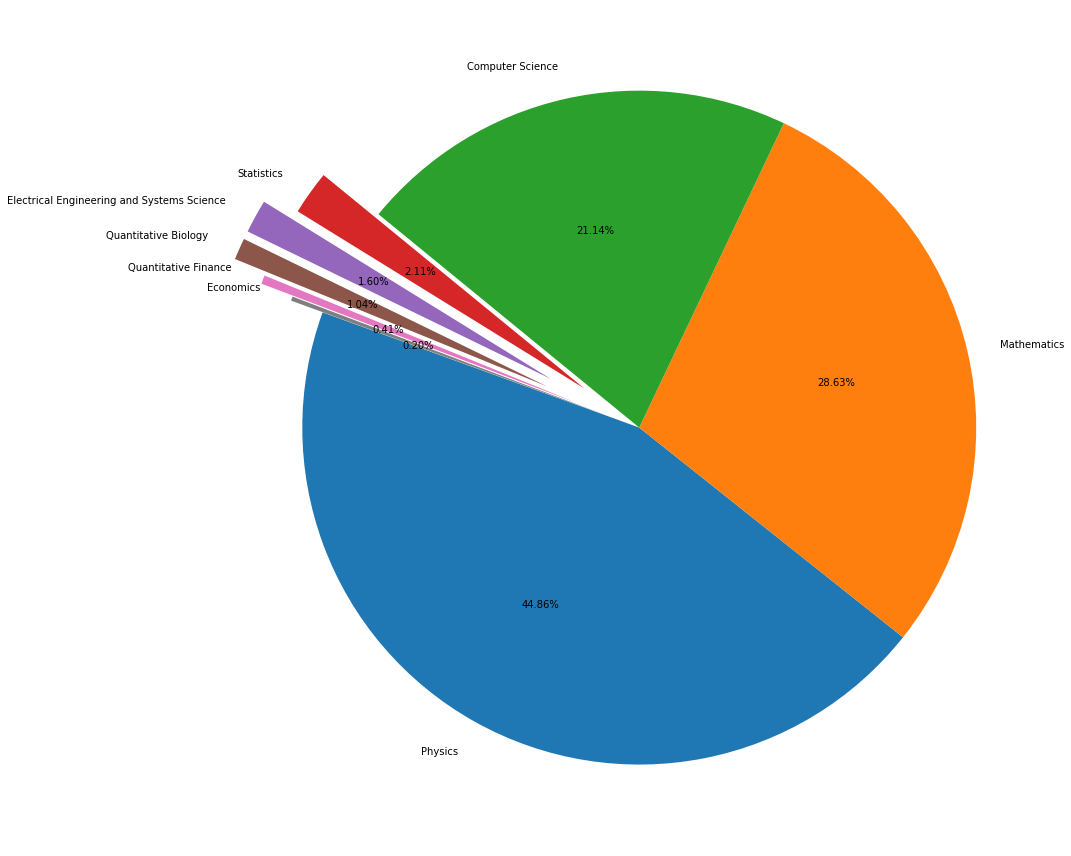

In [15]:
fig = plt.figure(figsize=(15,12))
explode = (0, 0, 0, 0.2, 0.3, 0.3, 0.2, 0.1) 
plt.pie(_df["id"],  labels=_df["group_name"], autopct='%1.2f%%', startangle=160, explode=explode)
plt.tight_layout()
plt.show()

下面统计在计算机各个子领域2019年后的paper数量，我们同样使用 merge 函数，对于两个dataframe 共同的特征 categories  进行合并并且进行查询。然后我们再对于数据进行统计和排序从而得到以下的结果：

In [16]:
group_name="Computer Science"
cats = data.merge(df_taxonomy, on="categories").query("group_name == @group_name")
cats.groupby(["year","category_name"]).count().reset_index().pivot(index="category_name", columns="year",values="id") 


year,2019
category_name,
Artificial Intelligence,558
Computation and Language,2153
Computational Complexity,131
"Computational Engineering, Finance, and Science",108
Computational Geometry,199
Computer Science and Game Theory,281
Computer Vision and Pattern Recognition,5559
Computers and Society,346
Cryptography and Security,1067


我们可以从结果看出，Computer Vision and Pattern Recognition（计算机视觉与模式识别）类是CS中paper数量最多的子类，遥遥领先于其他的CS子类，并且paper的数量还在逐年增加；另外，Computation and Language（计算与语言）、Cryptography and Security（密码学与安全）以及 Robotics（机器人学）的2019年paper数量均超过1000或接近1000，这与我们的认知是一致的。